## Sourcing & Analyzing Time-Series Data for NY CitiBike

This script contains the following:
1. Importing your libraries and data
2. Data preparation and aggregation.
3. Subsetting, wrangling, and cleaning time-series data
4. Time series analysis: decomposition
5. Testing for stationarity
6. Stationarizing the New York Citi Bike Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import os
from pylab import rcParams
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#ensuring the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Configuring personal API key 
quandl.ApiConfig.api_key = 'jfGxqvRsAfqbJR4kWX_6'

In [4]:
#creating path to import the files
path = r'C:\Users\rbrand\New York Citi Bikes'

In [5]:
# Importing cb_clean_data4.csv data set from prepared data.
cb_clean_data4 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data4.csv'), index_col=False)

In [6]:
cb_clean_data4.shape

(50000, 22)

In [7]:
cb_clean_data4.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,distance
0,0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,...,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000,1451.105634
1,1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,...,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333,1637.904949
2,2,2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,...,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667,922.070726
3,3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,...,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000,1543.233294
4,4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,...,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,1,38.266667,1469.427475


## 2. Data preparation and aggregation.

In [8]:
# Dropping columns not needed for this exercise
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'trip_id', 'bike_id', 'subscriber', 'birth_year', 'gender']

In [9]:
# Adjusting this list based on your actual dataset
cb_clean_data4.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Displaying the shape of the dataset to confirm columns were dropped
print(cb_clean_data4.shape)

(50000, 15)


In [11]:
cb_clean_data4.head()

,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,trip_duration_minutes,distance
0,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,16.550000,1451.105634
1,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,9.683333,1637.904949
2,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,6.016667,922.070726
3,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,9.350000,1543.233294
4,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,38.266667,1469.427475


In [12]:
type(cb_clean_data4)

pandas.core.frame.DataFrame

In [13]:
# Converting 'start_time' to datetime
cb_clean_data4['start_time'] = pd.to_datetime(cb_clean_data4['start_time'])

In [14]:
# Extracting date from 'start_time'
cb_clean_data4['date'] = cb_clean_data4['start_time'].dt.date

In [15]:
# Grouping by date and count the number of trips
rides_per_day = cb_clean_data4.groupby('date').size()

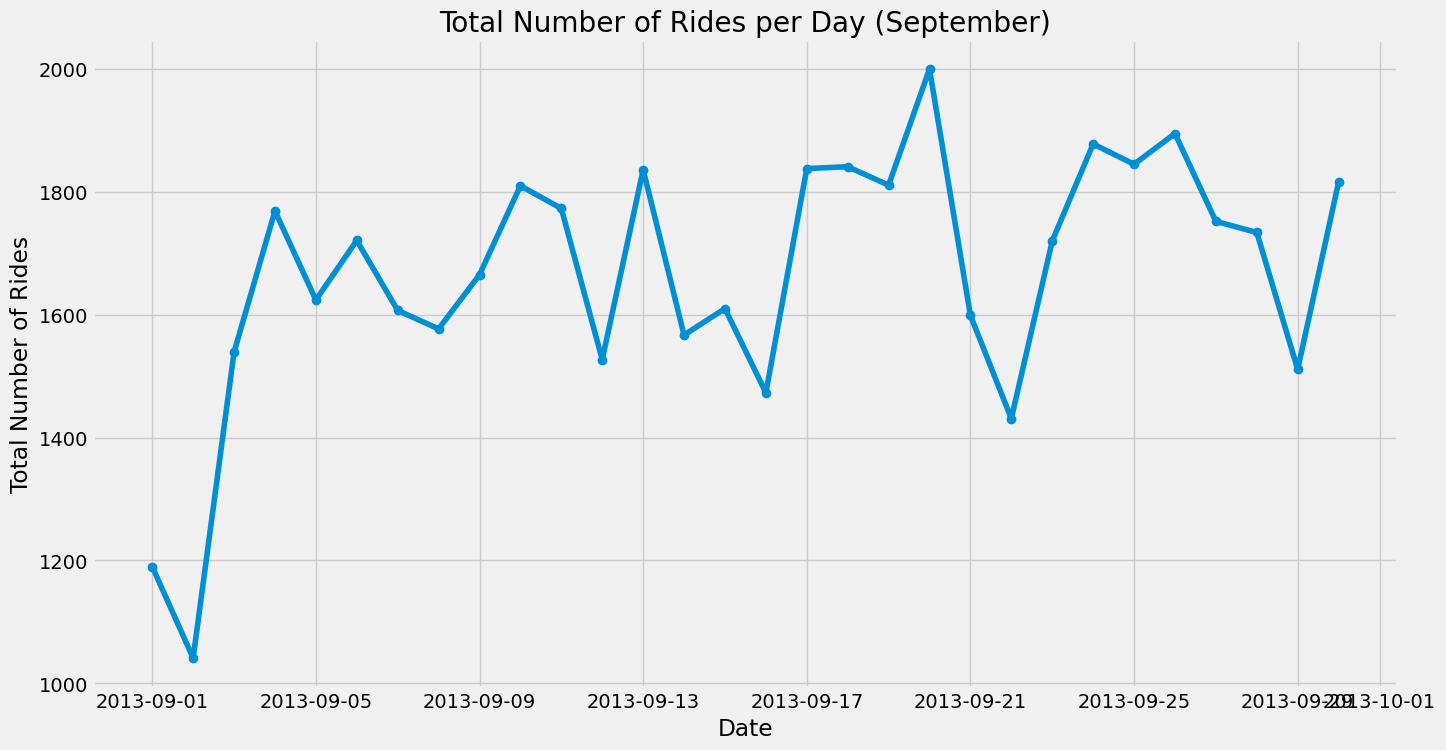

In [16]:
# Plotthing time series of total rides per day
plt.figure(figsize=(15, 8))
plt.plot(rides_per_day.index, rides_per_day.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Number of Rides')
plt.title('Total Number of Rides per Day (September)')
plt.grid(True)
plt.show()

In order to analyze the trend of bike trips over time to understand the overall usage pattern throughout the month of September, we followed the following steps:
- Data Preparation:
    - Loaded the bike trip dataset.
    - Converted the 'start_time' column to datetime format.
    - Extracted the date from the 'start_time' column.
- Data Aggregation:
    - Grouped the data by date.
    - Counted the total number of trips for each day.
- Visualization:
    - Plotted the time series of total rides per day.
    - Used a line plot to visualize the trend over time.
    - Added markers to highlight individual data points.
    
In September, the bike-sharing service recorded a total of 50,000 rides. On average, there were approximately 1,667 rides per day. The highest daily usage peaked at 2,000 rides 09/21), while the lowest recorded usage was 1,041 rides (09/01) beginning of the month.

## 3. Subsetting, wrangling, and cleaning time-series data

In [20]:
# Setting the "start_time" column as the index
data_sub = cb_clean_data4.loc[(cb_clean_data4['start_time'] >= '2013-09-01') & (cb_clean_data4['start_time'] < '2013-10-01')]
data_sub.set_index('start_time', inplace=True)

In [21]:
# Check for missing values
missing_values = data_sub.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
weekday                    0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
trip_duration_minutes      0
distance                   0
date                       0
dtype: int64


In [22]:
# Checking for duplicates
duplicates = data_sub.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates in the dataset:", num_duplicates)

Number of duplicates in the dataset: 12


In [23]:
# Removing duplicates
data_sub.drop_duplicates(inplace=True)

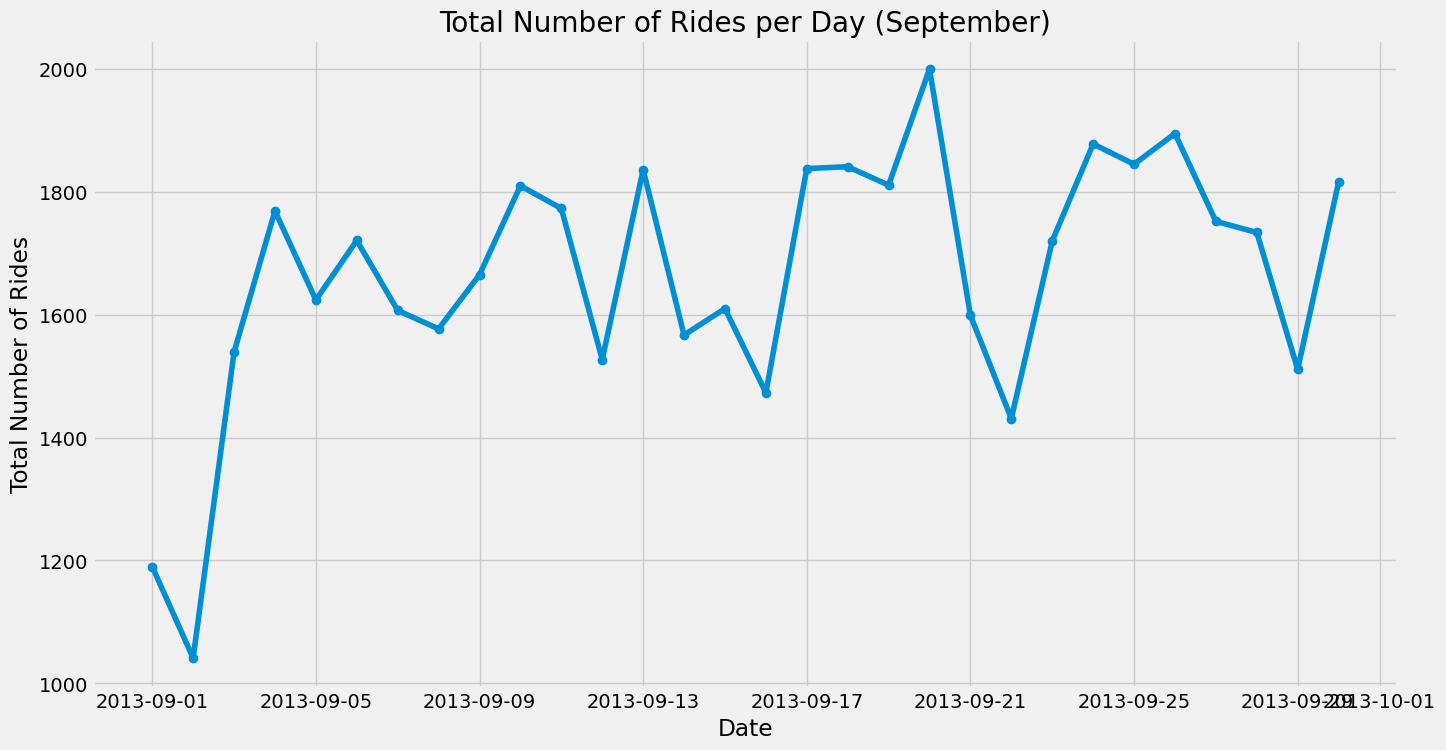

In [24]:
# Plotting time series of total rides per day
plt.figure(figsize=(15, 8))
plt.plot(rides_per_day.index, rides_per_day.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Number of Rides')
plt.title('Total Number of Rides per Day (September)')
plt.grid(True)
plt.show()

## 4. Time-series analysis: decomposition

In [27]:
# Converting the index to datetime
rides_per_day.index = pd.to_datetime(rides_per_day.index)

In [28]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(rides_per_day, model='additive')

In [29]:
# Setting the figure size for all special charts
rcParams['figure.figsize'] = 18, 7

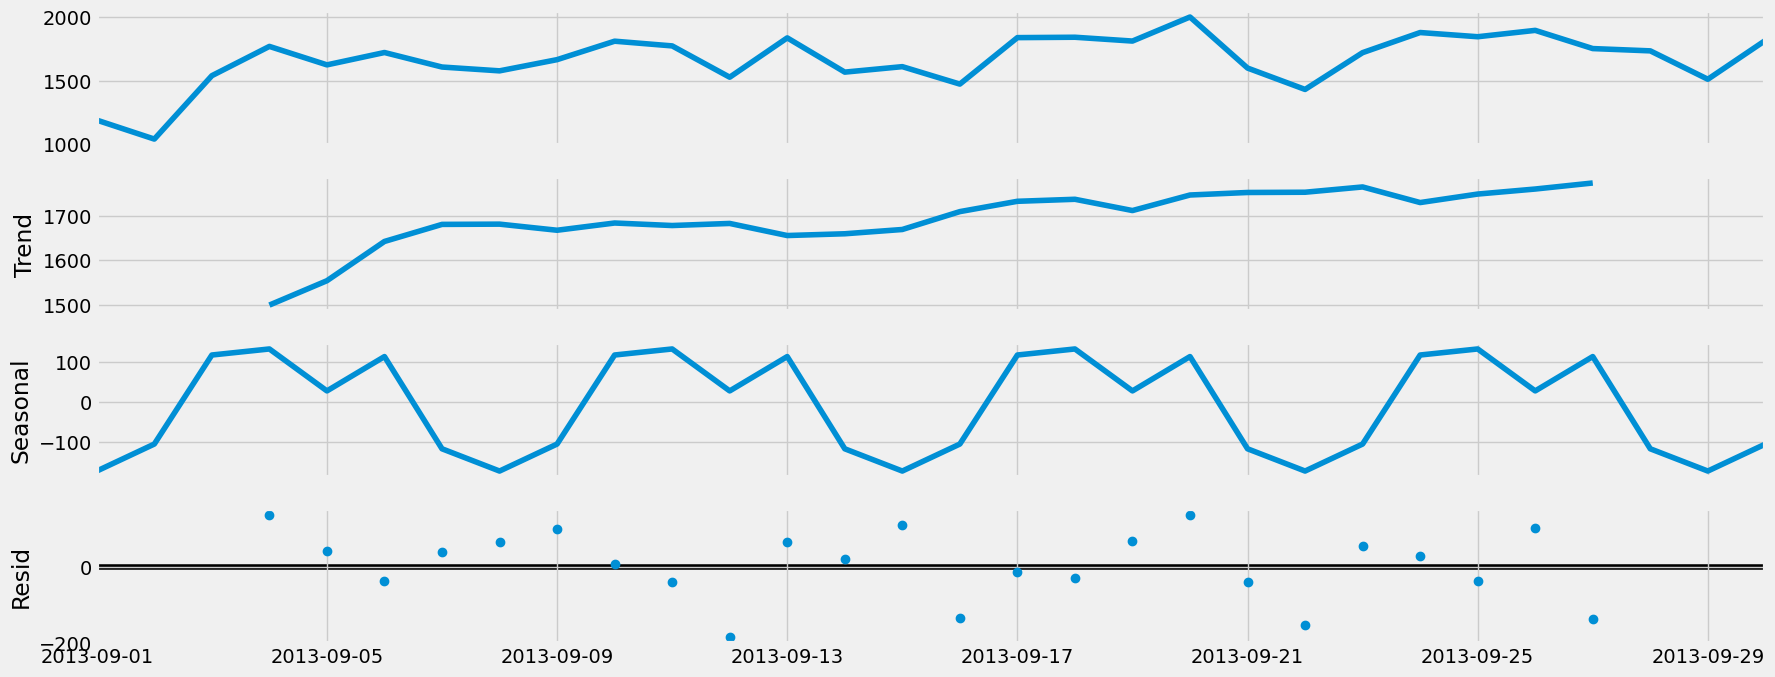

In [30]:
# Plotting the separate components of the decomposition
decomposition.plot()
plt.show()

- Trend Component:
    -Shows an increasing trend over time.
    -Low variability around the trend.
    -Fluctuates within a narrow range.
- Seasonal Component:
    -Captures periodic fluctuations.
    -High variability with no systematic pattern.
    -Fluctuates between positive and negative values.
Residual Component:
    -Represents unexplained variability.
    -No systematic pattern.
    -Fluctuates around zero.
Overall, the plot confirms an increasing trend with periodic fluctuations and random variability.

### 5. Testing for stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Defining a function to perform the Dickey-Fuller test and print the results
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [39]:
# Applying the Dickey-Fuller test to the 'trip_duration' time series
dickey_fuller(data_sub['trip_duration'])

Dickey-Fuller Stationarity test:
Test Statistic                  -223.142133
p-value                            0.000000
Number of Lags Used                0.000000
Number of Observations Used    49987.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64


<Figure size 1000x600 with 0 Axes>

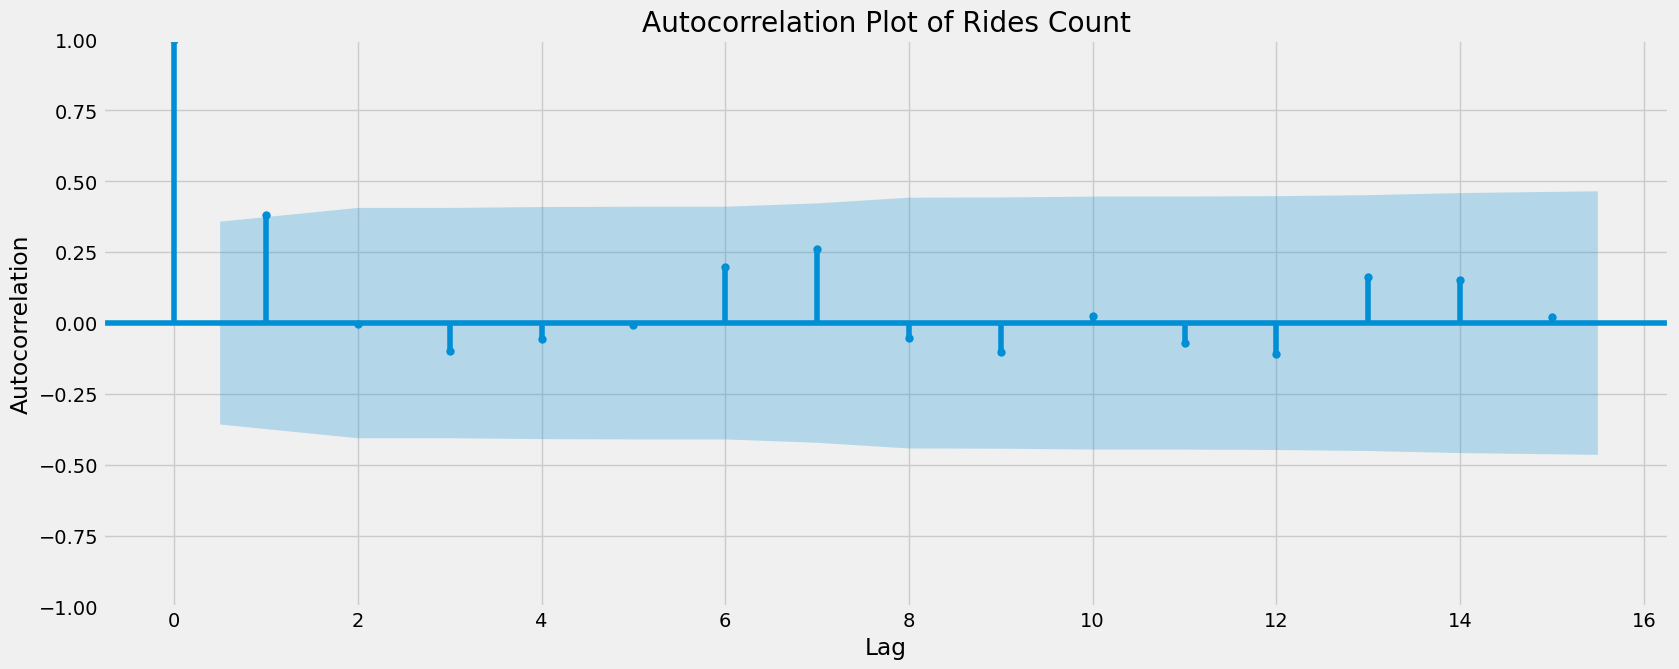

In [40]:
# Plot autocorrelation using the rides count data
plt.figure(figsize=(10, 6))
plot_acf(rides_per_day)
plt.title('Autocorrelation Plot of Rides Count')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

The Dickey-Fuller test tells us whether our data is stable or not. Here, the low p-value and the large negative number for the test statistic suggest our data is stable. Additionally, looking at the autocorrelation plot, we can see that each data point is quite similar to its neighbors. This means our data has a pattern and is not just random noise.

## 6. Stationarizing the New York Citi Bike Data

In [56]:
# Stationarizing the Citibike data using differencing
data_diff = rides_per_day - rides_per_day.shift(1)

In [57]:
# Removing missing values resulting from differencing
data_diff.dropna(inplace=True)

In [58]:
# Displaying the first few rows of the differenced data
print(data_diff.head())

date
2013-09-02   -149.0
2013-09-03    498.0
2013-09-04    230.0
2013-09-05   -145.0
2013-09-06     97.0
dtype: float64


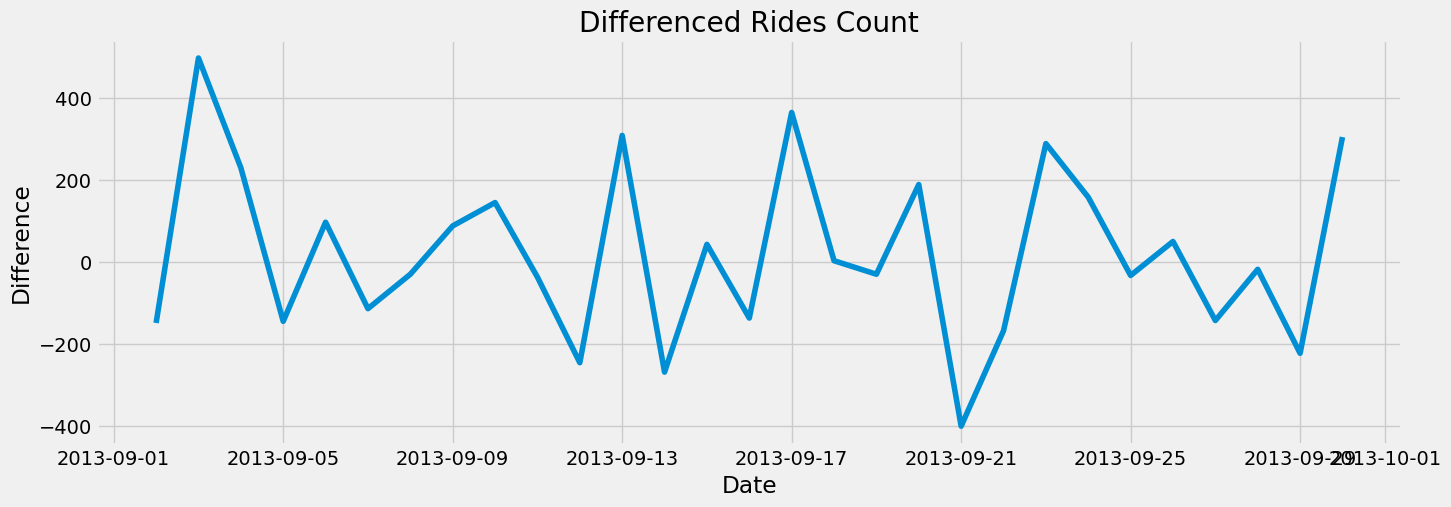

In [59]:
# Ploting the differenced data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff)
plt.title('Differenced Rides Count')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

In [60]:
# Performing the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.527630
p-value                         0.000175
Number of Lags Used             5.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


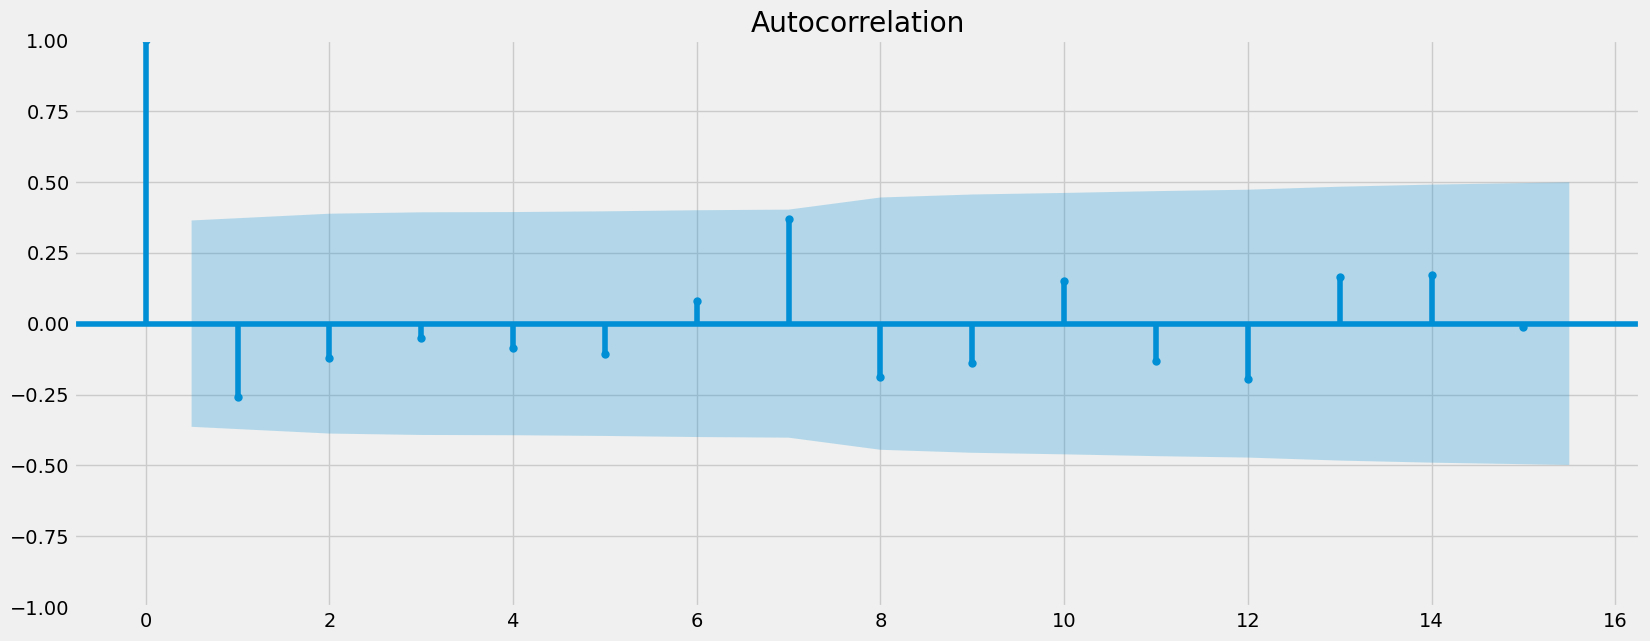

In [62]:
# Creating plot the autocorrelation of the differenced data
plot_acf(data_diff)
plt.show()

- Test Statistic: The value of -4.53 indicates a significant deviation from non-stationarity, suggesting the data is likely stationary.
- p-value: With a p-value of 0.000175, we have strong evidence to reject the null hypothesis of non-stationarity.
- Number of Lags Used: The test considered 5 lags, indicating the influence of past observations on the current one.
- Critical Values: The test statistic is well below the critical values at the 1%, 5%, and 10% levels, further supporting the conclusion of stationarity.

In summary, the data appears to be stationary, implying that it exhibits consistent statistical properties over time, making it suitable for time-series analysis.